# Neo4j Kernel (Demonstration)
This is a demonstration of a Neo4j kernel for Jupyter built with the [Callysto](https://github.com/ajmazurie/Callysto) project.

One of the first thing you need to do when working with this kernel is to connect it to an existing [Neo4j](http://neo4j.com/) server. Any text written in the cells of this notebook is then interpreted as a [Cypher](http://neo4j.com/developer/cypher/) command, and sent to the server. Results are displayed as tables or graphs.

This notebook is inspired from "A Matrix example" taken from the Neo4j [documentation](http://neo4j.com/docs/stable/shell-matrix-example.html).

Note that an excellent reference card for the Cypher language can be found [here](http://neo4j.com/docs/stable/cypher-refcard/).

## 1. Connecting to a Neo4j server

By default the Neo4j kernel will automatically attempt to connect to a Neo4j server on the local machine, accessible at port 7474 and with no credentials.

If for any reason you need to provide credentials, or use a non-default server address then you can connect to the server with the `!connect-to` magic command. Here we do so, then whipe the content of the server before getting started.

In [1]:
!connect-to http://localhost:7474/db/data --user neo4j --password j4neo
MATCH (n) OPTIONAL MATCH (n)-[r]-() DELETE n, r;

no rows returned

## 2. Adding some nodes
Let us add a few nodes representing the characters of the movie 'The Matrix'. Using the Cypher command `CREATE` we can declare nodes of two types ('Person' or 'Program') and with a property 'name':

In [2]:
CREATE
    (:Person {name:"Thomas Anderson"}),
    (:Person {name:"Morpheus"}),
    (:Person {name:"Trinity"}),
    (:Person {name:"Cypher"}),
    (:Program {name:"Agent Smith"}),
    (:Program {name:"The Architect"});

no rows returned

Now let's retrieve a list of all nodes created so far, asking for their name, types (label in Neo4j speak) and internal identifiers. The Neo4j kernel will detect that the result is a table, and will display it as such:

In [3]:
MATCH (n)
RETURN
    n.name AS `Name`,
    LABELS(n) AS `Label(s)`,
    ID(n) AS `ID`;

Name,Label(s),ID
Thomas Anderson,[u'Person'],1190
Morpheus,[u'Person'],1191
Trinity,[u'Person'],1192
Cypher,[u'Person'],1193
Agent Smith,[u'Program'],1194
The Architect,[u'Program'],1195


6 rows returned

By asking for a list of the nodes themselves (and not one or more of their properties) the kernel will detect that the result is a graph, and display it as such.

The Neo4j kernel can use any of the existing graph rendering backend provided with Callysto. Here we use the [Graphviz](http://www.graphviz.org/) renderer. The display can be customized by various magic commands, as seen below:

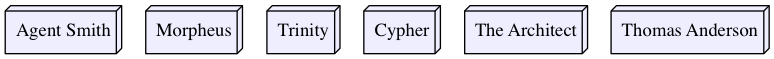

6 nodes, 0 edges returned

In [10]:
// we set the node labels to the "name" property
!set-node-label name

// we use the "dot" program (part of Graphviz) for layout
!set-layout-program dot

// we set some visual properties for the node;
// see http://www.graphviz.org/doc/info/attrs.html
!set-node-property shape box3d
!set-node-property style filled
!set-node-property fillcolor #eeeeff

// then we ask for all nodes
MATCH (n) RETURN n;

## 3. Adding some relationships
Now that we have some nodes, let's connect them using so-called relationships. Neo4j allows us to give relationships a type; here we use either 'KNOWS' or 'CODED_BY':

In [5]:
MATCH (source:Person {name: "Thomas Anderson"}), (target:Person {name: "Morpheus"})
    CREATE UNIQUE (source)-[:KNOWS]->(target);

MATCH (source:Person {name: "Thomas Anderson"}), (target:Person {name: "Trinity"})
    CREATE UNIQUE (source)-[:KNOWS]->(target);

MATCH (source:Person {name: "Morpheus"}), (target:Person {name: "Trinity"})
    CREATE UNIQUE (source)-[:KNOWS]->(target);

MATCH (source:Person {name: "Morpheus"}), (target:Person {name: "Cypher"})
    CREATE UNIQUE (source)-[:KNOWS]->(target);

MATCH (source:Person {name: "Cypher"}), (target:Program {name: "Agent Smith"})
    CREATE UNIQUE (source)-[:KNOWS]->(target);

MATCH (source:Program {name: "Agent Smith"}), (target:Program {name: "The Architect"})
    CREATE UNIQUE (source)-[:CODED_BY]->(target);

statement 1 of 6: no rows returned
statement 2 of 6: no rows returned
statement 3 of 6: no rows returned
statement 4 of 6: no rows returned
statement 5 of 6: no rows returned
statement 6 of 6: no rows returned

We can now ask for a list of all these relationships, together with their type:

In [6]:
MATCH
    (p1)-[r]->(p2)
RETURN
    p1.name AS `Name 1`,
    TYPE(r) AS `Type`,
    p2.name AS `Name 2`;

Name 1,Type,Name 2
Thomas Anderson,KNOWS,Trinity
Thomas Anderson,KNOWS,Morpheus
Morpheus,KNOWS,Cypher
Morpheus,KNOWS,Trinity
Cypher,KNOWS,Agent Smith
Agent Smith,CODED_BY,The Architect


6 rows returned

Finally, we can visualize the resulting graph by requesting a list of all the relationships:

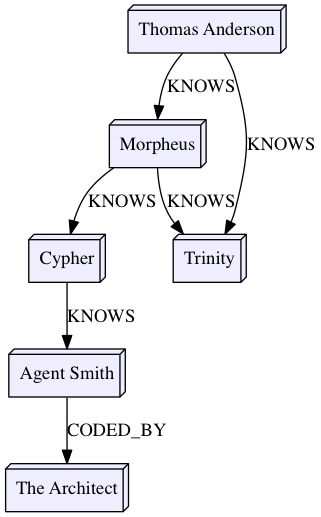

10 nodes, 6 edges returned

In [7]:
// we set the edges label to the edges' type by using the special value '_type'
!set-edge-label _type

MATCH (n)-[r]->()
RETURN r;

## 4. Querying the graph
From now on we can easily query any relationship or node on the graph by using the Cypher query language. The Neo4j kernel will know when to display a table or a graph depending on the query answers:

In [8]:
// ask who Morpheus knows, and list the name of these characters
// plus the type of the relationship between Morpheus and them
MATCH
    (:Person {name:"Morpheus"})-[r]->(n)
RETURN
    TYPE(r) AS `Type`,
    n.name AS `Name`;

Type,Name
KNOWS,Cypher
KNOWS,Trinity


2 rows returned

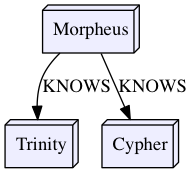

4 nodes, 2 edges returned

In [9]:
// do the same, but showing the result as a graph
MATCH (:Person {name:"Morpheus"})-[r]->()
RETURN r;